In [ ]:
import numpy as np
data = np.array([
        [2400, 41200],
        [2650, 50100],
        [2350, 52000],
        [4950, 66000],
        [3100, 44500],
        [2500, 37700],
        [5106, 73500],
        [3100, 37500],
        [2900, 56700],
        [1750, 35600]
])
def feature_scaling(data):
  npData = np.array(data)
  return ((npData - np.mean(npData)) / (np.max(npData) - np.min(npData))).reshape(-1, 1)
  # return np.array([(v - np.mean(data)) / (max(data) - min(data)) for v in data]).reshape(-1, 1)
scaling_X = feature_scaling(data[:, 0])
scaling_y = feature_scaling(data[:, 1])
scaling_X, scaling_y


(array([[-0.20280095],
        [-0.12830751],
        [-0.21769964],
        [ 0.55703218],
        [ 0.00578069],
        [-0.17300358],
        [ 0.60351609],
        [ 0.00578069],
        [-0.05381406],
        [-0.39648391]]), array([[-0.21846966],
        [ 0.01635884],
        [ 0.06649077],
        [ 0.43588391],
        [-0.13139842],
        [-0.31081794],
        [ 0.63377309],
        [-0.31609499],
        [ 0.19050132],
        [-0.36622691]]))

### process income-recreation data

linear_theta [[-1.67810210e-17]
 [ 8.65425926e-01]]


(0.030200517314581284, 0.028892283985835012)

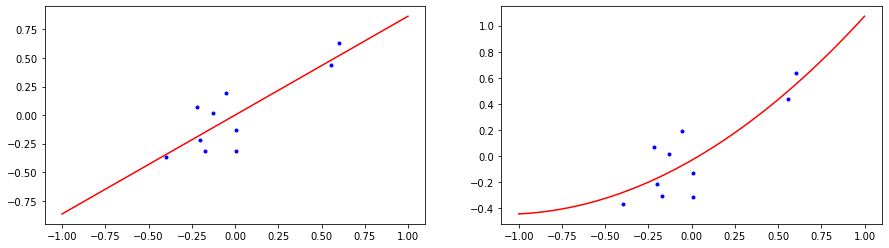

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def batch_gradient_descent(X, y, eta, iterations, lam=0):
  m = len(X)
  X_b = np.c_[np.ones((m, 1)), X]
  n = len(X_b[0])
  theta = np.zeros((n, 1))
  for i in range(iterations):
    predict_value = X_b.dot(theta)
    regularisation = lam * np.array([[0], *theta[1:]])
    theta = theta - eta*(1/m) * (X_b.T.dot(predict_value - y) + regularisation )
  return theta

linear_theta = batch_gradient_descent(scaling_X, scaling_y, 0.001, 100000)
print('linear_theta', linear_theta)
X_new = np.array([-1, 1]).reshape(2, 1)
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_new = X_new_b.dot(linear_theta)

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.plot(scaling_X, scaling_y, 'b.')
plt.plot(X_new, y_new, 'r-')


XX = np.c_[scaling_X, scaling_X**2]
# print(XX)
quadratic_theta = batch_gradient_descent(XX, scaling_y, .001, 100000)
# XX_new_b = np.array([[1, -1, 1], [1, 1, 1]])
# yy_new_b = XX_new_b.dot(quardratic_theta)
XX_new = np.linspace(-1, 1, 100).reshape(100, 1)
XX_new_b = np.c_[np.ones((len(XX_new), 1)), XX_new, XX_new**2]
yy_quad = XX_new_b.dot(quadratic_theta)

plt.subplot(122)
plt.plot(scaling_X, scaling_y, 'b.')
plt.plot(XX_new, yy_quad, 'r')

m = len(data)
J_train_linear = 1/m * sum(np.ravel((np.c_[np.ones((m, 1)), scaling_X].dot(linear_theta) - scaling_y)**2))
J_train_quadratic = 1/m * sum(np.ravel((np.c_[np.ones((m, 1)), XX].dot(quadratic_theta) - scaling_y)**2))
J_train_linear, J_train_quadratic


predict income-recreation new data

0.0035573830687559795 0.007927975012484332


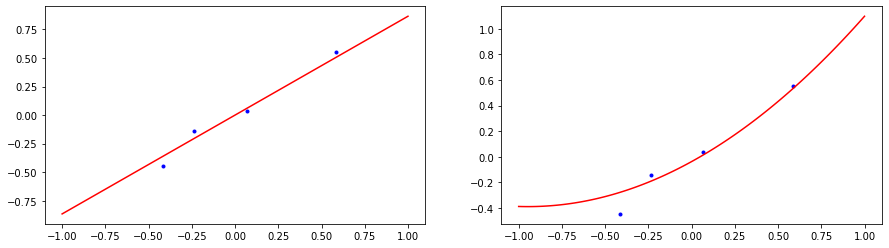

In [ ]:
new_data = np.array([
                     [3600, 52800],
                     [2750, 45100],
                     [2250, 32000],
                     [5050, 75000]
])

scaling_X2 = feature_scaling(new_data[:,0])
scaling_y2 = feature_scaling(new_data[:,1])
m = 4

linear_predict =  np.c_[np.ones((m, 1)), scaling_X2].dot(linear_theta)
J_linear = 1/m * sum(np.ravel((linear_predict - scaling_y2)**2))

quadratic_predict = np.c_[np.ones((m, 1)), scaling_X2, scaling_X2**2].dot(quadratic_theta)
J_quadratic = 1/m * sum(np.ravel((quadratic_predict - scaling_y2)**2))

print(J_linear, J_quadratic)

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.plot(scaling_X2, scaling_y2, 'b.')
plt.plot(X_new, y_new, 'r-')

plt.subplot(122)
plt.plot(scaling_X2, scaling_y2, 'b.')
plt.plot(XX_new, yy_quad, 'r')



#@markdown linear regression is better than quadratic


### regularised_batch_gradient_descent



In [ ]:
def batch_gradient_descent(X, y, eta, limit):
  m = len(X)
  X_b = np.c_[np.ones((m, 1)), X]
  n = len(X_b[0])
  theta = np.zeros((n, 1))
  for i in range(limit):
    theta = theta - eta * (1/m) * X_b.T.dot(X_b.dot(theta) - y)
  return theta

 # eta: learning rate
 # lam: regularisation parameter
def regularised_batch_gradient_descent(X, y, eta, iterations, lam):
  m = len(X)
  X_b = np.c_[np.ones((m, 1)), X]
  n = len(X_b[0])
  theta = np.zeros((n, 1))
  for i in range(iterations):
    predict_value = X_b.dot(theta)
    cal_theta = np.array([[0], *theta[1:]])
    theta = theta - eta*(1/m) * (X_b.T.dot(predict_value - y) + lam* cal_theta )
  return theta

def calJ(X, y, theta, lam=0):
  m = len(X)
  X_b = np.c_[np.ones((m, 1)), X]
  predict_value = X_b.dot(theta)
  cal_theta = np.array([[0], *theta[1:]])
  J = 1/(2*m) * (sum((predict_value - y)**2) + lam * sum( cal_theta**2))
  return J

### find the best theta

[[3175.42857143]
 [3018.27297278]]


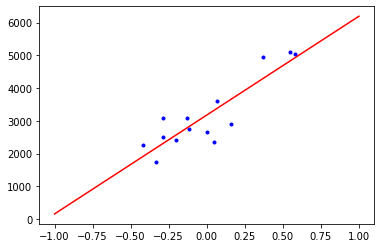

In [ ]:
all_data = np.array([*data, *new_data])
scaling_X3 = feature_scaling(all_data[:, 1])
# scaling_y3 = feature_scaling(all_data[:, 0])
scaling_y3 = all_data[:, 0].reshape(-1, 1)
regularised_theta = batch_gradient_descent(scaling_X3, scaling_y3, .1, 1000, .01)
print(regularised_theta)

import matplotlib.pyplot as plt
plt.plot(scaling_X3, scaling_y3, 'b.')
y_all_new = X_new_b.dot(regularised_theta)
plt.plot(X_new, y_all_new, 'r')
# plt.axis([-0.6, .6, -0.2, 1])

### find the best parameter

0 [3175.42857143 3040.93866528] train: [122647.97520108]   test: [234324.12758688]
0.01 [3175.42857143 3018.27297278] train: [125926.41899605]   test: [231105.25395847]
0.1 [3175.42857143 2828.50264896] train: [153370.16063589]   test: [206418.14547698]
1 [3175.42857143 1736.36629196] train: [311239.37650877]   test: [142937.55961681]
2 [3175.42857143 1215.05471859] train: [386588.66808878]   test: [159854.81067912]


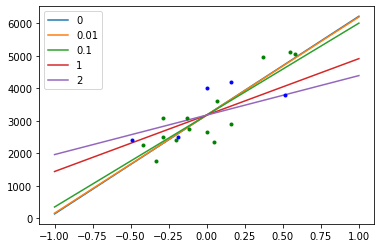

In [ ]:
another_data = np.array([
                       [4000, 53000],
                       [2500, 45000],
                       [2400, 32000],
                       [3800, 75000],
                       [4200, 60000]
])
scaling_X4 = feature_scaling(another_data[:, 1])
scaling_y4 = feature_scaling(another_data[:, 0]) # when getting best J, lam is 0
scaling_y4 = another_data[:, 0].reshape(-1, 1) # when getting best J, lam is 1
m = len(scaling_X4)
regularisation_parameters = [0, .01, .1, 1, 2]


for lam in regularisation_parameters:
  theta = batch_gradient_descent(scaling_X3, scaling_y3, .1, 1000, lam)

  train_J = calJ(scaling_X3, scaling_y3, theta, lam)
  
  predict_value = np.c_[np.ones((m, 1)), scaling_X4].dot(theta)
  test_J = calJ(scaling_X4, scaling_y4, theta)
  print(lam, np.ravel(theta),'train:', train_J, '  test:', test_J)


  y_temp = X_new_b.dot(theta)
  plt.plot(X_new, y_temp, label=lam)

plt.legend()
plt.plot(scaling_X3, scaling_y3, 'g.')
plt.plot(scaling_X4, scaling_y4, 'b.')
plt.show()